In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.12.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train_full.shape, X_train_full.dtype)
print(y_train_full.shape, y_train_full.dtype)

(60000, 28, 28) uint8
(60000,) uint8


In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Metal device set to: Apple M1 Pro


2023-02-11 22:32:47.498004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-11 22:32:47.498361: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
print(model.layers)
print(model.layers[1].name)

[<keras.layers.reshaping.flatten.Flatten object at 0x16c509ba0>, <keras.layers.core.dense.Dense object at 0x16c509510>, <keras.layers.core.dense.Dense object at 0x17d6a78b0>, <keras.layers.core.dense.Dense object at 0x17d6a7b50>]
dense


In [12]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.00452392, -0.00647739, -0.07263169, ...,  0.01030535,
        -0.02424559,  0.06767181],
       [-0.03285758, -0.02016141,  0.05234282, ..., -0.02231894,
        -0.04908814, -0.03404501],
       [-0.02888012, -0.05589306, -0.0155475 , ..., -0.01039809,
        -0.07296321, -0.04645436],
       ...,
       [ 0.01264486,  0.06930096,  0.04427198, ...,  0.03716847,
        -0.07377405,  0.02668943],
       [ 0.047931  ,  0.03334209,  0.03160445, ...,  0.00234746,
        -0.054644  ,  0.04743989],
       [-0.06227957, -0.06958544, -0.03628303, ..., -0.02435179,
         0.03925075,  0.02857641]], dtype=float32)

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-02-11 22:33:01.996697: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-11 22:33:02.091474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7112 - accuracy: 0.7658

2023-02-11 22:33:11.222140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.7112 - accuracy: 0.7658 - val_loss: 0.4986 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4873 - accuracy: 0.8309 - val_loss: 0.4459 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4419 - accuracy: 0.8461 - val_loss: 0.4390 - val_accuracy: 0.8422
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4146 - accuracy: 0.8541 - val_loss: 0.4019 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3939 - accuracy: 0.8621 - val_loss: 0.4502 - val_accuracy: 0.8382
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3784 - accuracy: 0.8664 - val_loss: 0.3747 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3646 - accuracy: 0.8701 - val_loss: 0.3549 - val_accuracy: 0.8720


(0.0, 1.0)

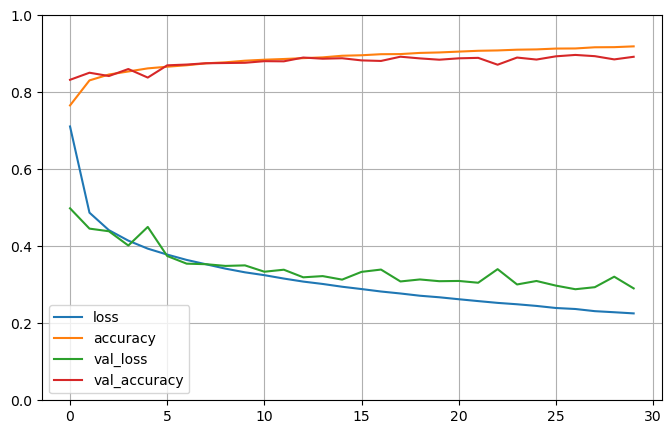

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) 

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 57.8290 - accuracy: 0.8492


[57.82903289794922, 0.8492000699043274]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 142ms/step


2023-02-12 00:00:58.601497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
predictions = np.argmax(y_proba, axis=1)

In [30]:
np.array(class_names)[predictions]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')